## Repos

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite_utils import Database

sns.set(color_codes=True)

In [2]:
db = Database("mybinder_archive.db")

In [3]:
# get table names
db.table_names()

['mybinderlaunch', 'repo']

In [4]:
repo_table = 'repo'

In [5]:
# db[repo_table].columns
db[repo_table].columns_dict

{'id': int,
 'remote_id': str,
 'provider': str,
 'repo_url': str,
 'first_launch_ts': str,
 'last_launch_ts': str,
 'last_spec': str,
 'ref': str,
 'resolved_ref': str,
 'resolved_date': str,
 'resolved_ref_date': str,
 'fork': int,
 'renamed': int,
 'launch_count': int,
 'binder_dir': str,
 'buildpack': str}

In [6]:
query = f'SELECT * FROM {repo_table} ORDER BY first_launch_ts;'
repos = pd.read_sql_query(query, db.conn)
# repos = repos[
#     ["id", "remote_id", "provider", "repo_url", 
#      "last_spec", "resolved_ref", "launch_count", 
#      "fork","renamed", "launch_count", 
#      "binder_dir", "buildpack", "nbs_count"]]

In [7]:
# def make_clickable(val):
#     return '<a target="_blank" href="{}">{}</a>'.format(val, val)

In [8]:
# repos.style.format({'repo_url': make_clickable})

In [9]:
len(repos)

53371

In [10]:
repos.head()

,id,remote_id,provider,repo_url,first_launch_ts,last_launch_ts,last_spec,ref,resolved_ref,resolved_date,resolved_ref_date,fork,renamed,launch_count,binder_dir,buildpack
0,1,3641953,GitHub,https://github.com/ipython/ipython-in-depth,2018-11-03T00:00:00,2020-08-04T23:58:00,ipython/ipython-in-depth/master,master,7e5ce96cc9251083979efdfc393425f1229a4a68,2020-08-05T10:58:00,2019-04-22T15:12:08,0,0.0,3770089,binder,CondaBuildPack
1,2,99244384,GitHub,https://github.com/qiskit/qiskit-tutorial,2018-11-03T00:00:00,2020-07-30T19:09:00,QISKit/qiskit-tutorial/master,master,208351863f269bb8998aa990ad4996245d7713ac,2020-08-05T10:58:00,2020-07-31T10:24:22,0,2.0,22343,,CondaBuildPack
2,3,None,GitHub,https://github.com/eniocsj/dados,2018-11-03T00:01:00,2018-11-14T12:15:00,eniocsj/dados/master,master,None,None,None,404,NaN,42,None,None
3,4,69698350,GitHub,https://github.com/jupyterlab/jupyterlab-demo,2018-11-03T00:01:00,2020-08-04T23:57:00,jupyterlab/jupyterlab-demo/try.jupyter.org,try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,2020-08-05T10:58:00,2019-07-10T17:08:41,0,0.0,1799243,binder,CondaBuildPack
4,5,21578345,GitHub,https://github.com/bokeh/bokeh-notebooks,2018-11-03T00:02:00,2020-08-04T23:42:00,bokeh/bokeh-notebooks/master,master,7b6da26945e284b19df07daecc6beabdb7adbe81,2020-08-05T10:58:00,2020-07-20T22:34:18,0,0.0,153560,,CondaBuildPack


### Understanding repos table

#### Forks

In [11]:
repos.fillna(-1).groupby("fork").size()
# query = f'select fork, count(*) from {repo_table} group by "fork";'
# forks = pd.read_sql_query(query, db.conn)

fork
0      42273
1       4914
404     6182
451        2
dtype: int64

fork=404 means that repo doesnt exist anymore.

now check those 2 repos which have fork as 451

In [12]:
repos[repos["fork"] == 451][["resolved_ref", "repo_url"]]

,resolved_ref,repo_url
16580,None,https://github.com/doublelabyrinth/mobaxterm-k...
25415,None,https://github.com/abhat222/data-science--chea...


These 2 repos returns "Repository access blocked" ("HTTP 451: Unavailable for Legal Reasons")
- https://github.com/doublelabyrinth/mobaxterm-keygen
- https://github.com/abhat222/data-science--cheat-sheet

In [13]:
len(repos[repos["fork"].isin([404, 451])])

6184

In [14]:
# if fork is 404, remote_id should be null (not available)
repos[repos["remote_id"].isnull()].fillna(-1).groupby("fork", as_index = False).size()

fork
404    6182
451       2
dtype: int64

In [15]:
repos[repos["fork"].isin([404, 451])][["repo_url", "remote_id", "last_spec", "ref", "resolved_ref",
                                   "resolved_date", "resolved_ref_date", "binder_dir", 
                                    "buildpack"]]

,repo_url,remote_id,last_spec,ref,resolved_ref,resolved_date,resolved_ref_date,binder_dir,buildpack
2,https://github.com/eniocsj/dados,None,eniocsj/dados/master,master,None,None,None,None,None
15,https://github.com/udm88/home_work_2,None,udm88/home_work_2/master,master,None,None,None,None,None
17,https://github.com/liviu-anita/calcul-numeric,None,liviu-anita/Calcul-Numeric/master,master,None,None,None,None,None
38,https://github.com/bengal-tiger/youcandothermo...,None,BENGAL-TIGER/YOUcanDoThermodynamics/master,master,None,None,None,None,None
39,https://github.com/marlohaering/se1-notebook,None,marlohaering/SE1-Notebook/master,master,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
53119,https://github.com/lancereinsmith/templatereview,None,lancereinsmith/templatereview.git/master,master,None,None,None,None,None
53120,https://github.com/optosoft/opticalstacks,None,optosoft/opticalstacks.git/master,master,None,None,None,None,None
53177,https://gist.github.com/rubenzv/de739f7e4b2da6...,None,RubenZV/de739f7e4b2da66f6882e7218f748a30/master,master,None,None,None,None,None
53205,https://github.com/hell0venus/nbinteract-tutor...,None,hell0venus/nbinteract-tutorial2/master,master,None,None,None,None,None


#### Resolved refs

`create_repo_table.py` fetches resolved ref of the last spec at the time that the script is running (resolved_date).
`resolved_ref="404"` means that the specs is not valid anymore.

In [16]:
repos[["repo_url", "last_spec", "ref", "resolved_ref", "fork"]]

,repo_url,last_spec,ref,resolved_ref,fork
0,https://github.com/ipython/ipython-in-depth,ipython/ipython-in-depth/master,master,7e5ce96cc9251083979efdfc393425f1229a4a68,0
1,https://github.com/qiskit/qiskit-tutorial,QISKit/qiskit-tutorial/master,master,208351863f269bb8998aa990ad4996245d7713ac,0
2,https://github.com/eniocsj/dados,eniocsj/dados/master,master,None,404
3,https://github.com/jupyterlab/jupyterlab-demo,jupyterlab/jupyterlab-demo/try.jupyter.org,try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,0
4,https://github.com/bokeh/bokeh-notebooks,bokeh/bokeh-notebooks/master,master,7b6da26945e284b19df07daecc6beabdb7adbe81,0
...,...,...,...,...,...
53366,https://github.com/vinnief/notebooks,vinnief/notebooks/master,master,307de1d53955e4059485b43934325d825d2df32f,0
53367,https://github.com/nikitadushakov/nbinteract,nikitadushakov/nbinteract/master,master,06da7b26d85c04da54a6fb1c7806756b3041003c,0
53368,https://github.com/danielcs88/covid-19,danielcs88/covid-19/master,master,0f76548fee3e39d4caf5cd6d6e1eaae4eeb13f90,0
53369,https://github.com/mmorphew/unet_remote_sensing,mmorphew/UNet_Remote_Sensing/master,master,a0df1a1198acf19b3dc66ebb40384e12c9cdecf8,0


In [17]:
len(repos[repos["resolved_ref"].isnull() |  (repos["resolved_ref"] == "404")])

6532

resolved ref is null, if fork is 404 or 451

In [18]:
print(len(repos[repos["resolved_ref"].isnull()]))
print(len(repos[repos["resolved_ref"].isnull() & repos["fork"].isin([404, 451])]))

6191
6184


These 7 repos exist but had error while getting the resolved ref info:

- https://github.com/twbs/bootstrap : 
```
Exception: ['git', 'checkout', 'gh-pages']: error: Your local changes to the following files would be overwritten by checkout:
...
Please, commit your changes or stash them before you can switch branches.
```
- https://github.com/lakarstens/controllingcontaminants16s:
```
Exception: ['git', 'clone', 'https://github.com/lakarstens/controllingcontaminants16s', '/tmp/tmplvvc0_ux']: Cloning into '/tmp/tmplvvc0_ux'...
error: Invalid path '.git:info:exclude'
fatal: unable to checkout working tree
warning: Clone succeeded, but checkout failed.
You can inspect what was checked out with 'git status'
and retry the checkout with 'git checkout -f HEAD'
```
- https://github.com/noahgriff99/320-final-project: 
```
Exception: ['git', 'checkout', '925075b4aec9bf4f2329bd60e6d5fd5fbc8c2bd3']: error: Your local changes to the following files would be overwritten by checkout:
	BillboardNSpotify.html
	index.html
	index.html.html
Please, commit your changes or stash them before you can switch branches.
```
- https://gist.github.com/vb16/0827905b1e8f4a0a76ff: 
```
Exception: ['git', 'clone', 'https://gist.github.com/vb16/0827905b1e8f4a0a76ff', '/tmp/tmp2amqsj1u']: Cloning into '/tmp/tmp2amqsj1u'...
fatal: could not read Username for 'https://gist.github.com': terminal prompts disabled
```
- https://github.com/koldanya/water:
```
Exception: ['git', 'checkout', '96b97b2ec30213b29ee602c76f14ea515fbd97a4']: error: Your local changes to the following files would be overwritten by checkout:
	README.md
Please, commit your changes or stash them before you can switch branches.
```
- https://github.com/dsyme/diffsharp:
```
Exception: ['git', 'checkout', 'gh-pages']: error: Your local changes to the following files would be overwritten by checkout:
        DiffSharp.sln
        src/DiffSharp.Core/Tensor.fs
```
- https://github.com/1-2-3-4-5ggg/melnikov.zhuravlev:
```
Exception: ['git', 'checkout', 'Titanic']: error: Your local changes to the following files would be overwritten by checkout:
        titanic-machine-learning-from-disaster.html
```

Some repos exists but resolved_ref of their spec doesn't

TODO what are reasons for this?
1. spec is not valid anymore, e.g. branch is deleted

In [19]:
len(repos[repos["resolved_ref"] == "404"])

341

In [20]:
# select fork, remote_id, last_spec, resolved_ref,refs,repo_url from repo where resolved_ref=404 and fork!=404;
repos[(repos["resolved_ref"] == "404") & 
      (repos["fork"].isin([0,1]))][["repo_url", "last_spec", "ref", "resolved_ref",
                                   "resolved_date", "resolved_ref_date", "binder_dir", 
                                    "buildpack"]]

,repo_url,last_spec,ref,resolved_ref,resolved_date,resolved_ref_date,binder_dir,buildpack
70,https://github.com/delsim/jupyter-plotly-dash,delsim/jupyter-plotly-dash/messaging,messaging,404,2020-08-05T10:59:00,None,None,None
87,https://github.com/jiaweizhuang/geoschem-pytho...,JiaweiZhuang/GEOSChem-python-tutorial/master,master,404,2020-08-05T10:59:00,None,None,None
270,https://github.com/jhamman/dask-examples,jhamman/dask-examples/xarray,xarray,404,2020-08-05T11:01:00,None,None,None
455,https://github.com/pymlvizard/mlpyviz,PyMLVizard/MLPyViz/develop_GD,develop_GD,404,2020-08-05T11:04:00,None,None,None
785,https://github.com/binderhub-ci-repos/requirem...,binderhub-ci-repos/requirements/1596267134.109...,1596267134.1099377,404,2020-08-05T11:08:00,None,None,None
...,...,...,...,...,...,...,...,...
52555,https://github.com/obar1/books,obar1/books/book/9781449359034,book/9781449359034,404,2020-08-05T22:13:00,None,None,None
52639,https://github.com/ccordoba12/spyder,ccordoba12/spyder/improve-binder,improve-binder,404,2020-08-05T22:13:00,None,None,None
52695,https://github.com/thmasker/dante,thmasker/DAntE/dev,dev,404,2020-08-05T22:14:00,None,None,None
52982,https://github.com/ecell/transomics2cytoscape,ecell/transomics2cytoscape/use-toolsfile_ext,use-toolsfile_ext,404,2020-08-05T22:16:00,None,None,None


There are repos that have same resolved ref but have different remote ids.

One reason could be that a user creates a new repo with history of another repo (without using github forking)

In [21]:
query = f'select fork, renamed, count(resolved_ref) as rr_count, resolved_ref, '\
                 f'GROUP_CONCAT(DISTINCT repo_url) AS repo_urls '\
        f'from {repo_table} '\
        f'where fork=0 AND renamed=0 '\
        f'group by "resolved_ref" '\
        f'having rr_count>1;'
pd.read_sql_query(query, db.conn)
# query = 'select fork, renamed, count(resolved_ref) as rrn_count, resolved_ref, GROUP_CONCAT(DISTINCT repo_url) AS repo_urls from repo where fork!=1 AND renamed!=1 group by "resolved_ref" having rrn_count>1;'
# pd.read_sql_query(query, db.conn)

,fork,renamed,rr_count,resolved_ref,repo_urls
0,0,0,2,051d6dc57f10b605485bea0c3565130eaf064ec8,"https://github.com/data-8/materials-su18,https..."
1,0,0,2,13b1be597a25a1ce3c99e0aa3e714514b515346f,"https://github.com/teaglesj/queueing-theory,ht..."
2,0,0,6,20095e168f0d76da5787f914684cc3b6a58ce660,https://github.com/wshuyi/demo-spacy-text-proc...
3,0,0,2,218183a0845ec89cd4d27e8f350ccdc595855d87,"https://github.com/ines/course-starter-python,..."
4,0,0,2,2d2668d3b9a54546c681bc27efbbc9b326af1ab1,https://github.com/deep-diver/smartwork-with-p...
5,0,0,2,34f27959e509527945e3f2dfa6996f5f43b93750,"https://github.com/ines/course-starter-r,https..."
6,0,0,4,36bc4827ea1b53afd099e79a91d73614a6116bfe,"https://github.com/eminentspade/codingai-pub,h..."
7,0,0,2,3a95d118f9df5a86826e1791c5c100817f0fd924,https://github.com/udacity/deep-learning-v2-py...
8,0,0,2,3d0c70ddaa5c63606a043aaca35b64f4272651e0,"https://github.com/jason2249/section-8-a,https..."
9,0,0,146,404,https://github.com/jiaweizhuang/geoschem-pytho...


#### Renamed repos
If repo x is renamed to y, then both rows have same "remote_id" and have "renamed" as "number of times that repo is renamed"

In [22]:
repos.fillna(-1).groupby("renamed").size()

renamed
-1.0     6184
 0.0    45068
 1.0     1936
 2.0      171
 3.0       12
dtype: int64

In [23]:
# if renamed info is not available, this means repo doesnt exists
repos[repos["renamed"].isnull()].groupby("fork", as_index = False).size()

fork
404    6182
451       2
dtype: int64

In [24]:
# list renamed repos
query = 'select fork, renamed, remote_id, GROUP_CONCAT(DISTINCT repo_url) AS repo_urls from repo where renamed!=0 group by "remote_id";'
pd.read_sql_query(query, db.conn)

,fork,renamed,remote_id,repo_urls
0,0,1,102113664,"https://github.com/eamonnmag/cern-csc-2018,htt..."
1,0,1,102488943,https://github.com/belfasttechtraining/python-...
2,0,2,103228562,https://github.com/rambasnet/thinkpythonnotebo...
3,0,1,103370184,"https://github.com/stklik/crest,https://github..."
4,0,1,103943609,"https://github.com/jordan-melendez/gsum,https:..."
...,...,...,...,...
1023,0,1,98531561,"https://github.com/quantstack/xwidgets,https:/..."
1024,0,1,99154413,"https://github.com/swyddfa/stylo,https://githu..."
1025,0,2,99244384,"https://github.com/qiskit/qiskit-tutorial,http..."
1026,0,1,d47484ac43a964fcea6547f36a5fdaa0,https://gist.github.com/akuzmanoski/d47484ac43...


In [25]:
# list renamed repos (in pandas)
repos[repos["renamed"] != 0].\
    groupby(["fork", "renamed", "remote_id"])["repo_url"].\
    apply(",".join).reset_index()

,fork,renamed,remote_id,repo_url
0,0,1.0,102113664,"https://github.com/eamonnmag/cern-csc-2018,htt..."
1,0,1.0,102488943,https://github.com/belfasttechtraining/python-...
2,0,1.0,103370184,"https://github.com/stklik/crest,https://github..."
3,0,1.0,103943609,"https://github.com/jordan-melendez/gsum,https:..."
4,0,1.0,104022893,"https://github.com/moeshana/shana_php,https://..."
...,...,...,...,...
1023,1,1.0,98225713,https://github.com/alleninstitute/multipatch_a...
1024,1,2.0,159360441,https://github.com/keckelt/python-tutorial-va2...
1025,1,2.0,171341996,"https://github.com/astrobiomike/conda,https://..."
1026,1,2.0,183420043,"https://github.com/tsyshiu/python3,https://git..."


### Number of repos

In [26]:
# db[repo_table].count
len(repos)

53371

array([[<AxesSubplot:title={'center':'launch_count'}>]], dtype=object)

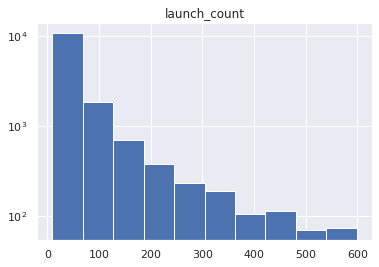

In [33]:
# renamed repos have the same remote_id
len(repos.groupby("remote_id"))

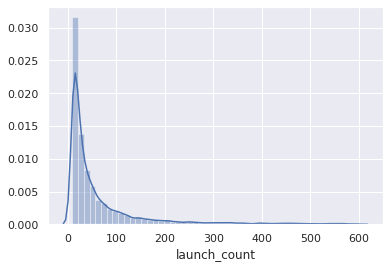

In [34]:
sns.distplot(repos_10_600["launch_count"]);

### Buildpacks

In [35]:
repos.fillna(-1).groupby("buildpack").size()

buildpack
-1                              6532
CondaBuildPack                  7965
DockerBuildPack                 2282
JuliaProjectTomlBuildPack        473
JuliaRequireBuildPack             90
LegacyBinderDockerBuildPack      106
NixBuildPack                      16
PipfileBuildPack                 294
PythonBuildPack                34192
RBuildPack                      1421
dtype: int64

### Binder dirs

In [36]:
repos.fillna(-1).groupby("binder_dir").size()

binder_dir
-1          6532
           43214
.binder      468
binder      3157
dtype: int64